ARBRE DE DECISION ----> HAROUNA BA

L'objectif est de construire une arbre de decision qui nous permet de classifier au maximum des individus selon ses caracteristiques

In [19]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz #arbre en image
from sklearn.tree import DecisionTreeClassifier, plot_tree 

In [9]:
dat = pd.read_excel('Scoring2bancaire.XLS')

In [10]:
dat

,doublant,serie,mention,classe
0,0,1,1,1
1,0,2,1,1
2,1,3,1,0
3,1,3,2,1
4,0,1,2,1
5,0,2,2,1
6,1,3,0,0
7,1,1,0,0
8,1,2,0,0
9,1,1,3,1


In [60]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   doublant  12 non-null     int64
 1   serie     12 non-null     int64
 2   mention   12 non-null     int64
 3   classe    12 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [11]:
dat.head()

,doublant,serie,mention,classe
0,0,1,1,1
1,0,2,1,1
2,1,3,1,0
3,1,3,2,1
4,0,1,2,1


definition des variables explicatives et variable independantes

In [12]:
x= dat.iloc[:,:-1].values #toutes les lignes et colonnes sauf la derniere
y= dat.iloc[:,-1].values #toutes les lignes de la derniere colonne

Division du dataframe en train et test

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Mise en place du model en entrainement de notre model

In [14]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
#precision globale sur les donnees d'entrainement
tree_model.score(X_train,y_train)

1.0

In [74]:
#verifier la qualité de notre model
Y_pred = tree_model.predict(X_test)
tree_model.score(X_test,y_test)

1.0

VISUALISATION DU MODEL ARBRE DE DECISION

In [50]:
export_graphviz(tree_model, out_file='tree.dot', max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False)

J'ai obtenu le fichier tree.do mais un probleme est survenu lors de la conversion en image

In [65]:
from sklearn.tree import export_graphviz
dot = export_graphviz(tree_model, out_file=None)
print("\n".join(dot.split('\n')[:10]) + "\n...")

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]"] ;
1 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 2.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
2 -> 3 ;
...


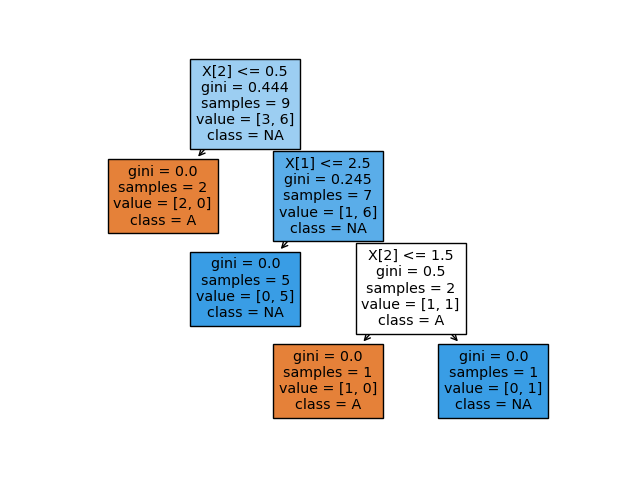

In [69]:
plot_tree(tree_model, feature_names=None, class_names=['A','NA'],filled=True)
plt.show()

HAROUNA BA